# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle.

In [38]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [39]:
obesidade = pd.read_csv("obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [40]:
obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [41]:
obesidade['Obesity'] = obesidade['Obesity (%)'].apply(lambda x: x.split(' ')[0])

obesidade.loc[obesidade['Obesity'] == 'No', 'Obesity'] = np.nan
obesidade.dropna(inplace = True)
obesidade['Obesity'] = obesidade['Obesity'].apply(lambda x: float(x))

obesidade.drop(columns = ['Unnamed: 0', 'Obesity (%)'], inplace = True)

In [42]:
obesidade.head()

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [43]:
obesidade[obesidade['Year'] == 2015].groupby('Sex').mean()['Obesity']

Sex
Both sexes    19.508377
Female        22.899476
Male          15.980628
Name: Obesity, dtype: float64

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [44]:
obesidade_start = obesidade[obesidade['Year'] == 1975]
obesidade_end = obesidade[obesidade['Year'] == 2016]
obesidade_start.set_index('Country', inplace = True)
obesidade_end.set_index('Country', inplace = True)
obesidade_dif = obesidade_end[obesidade_end['Sex'] == 'Both sexes']['Obesity'] - obesidade_start[obesidade_start['Sex'] == 'Both sexes']['Obesity']

In [45]:
obesidade_dif.sort_values().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

In [46]:
obesidade_dif.sort_values().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [47]:
obesidade_2015 = obesidade[obesidade['Year'] == 2015].copy()
obesidade_2015[obesidade_2015['Obesity'] == obesidade_2015['Obesity'].max()]

,Country,Year,Sex,Obesity
15116,Nauru,2015,Female,63.1


In [48]:
obesidade_2015[obesidade_2015['Obesity'] == obesidade_2015['Obesity'].min()]

,Country,Year,Sex,Obesity
24187,Viet Nam,2015,Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [49]:
ob_brasil = obesidade[obesidade['Country'] == 'Brazil']
ob_brasil.set_index('Year', inplace = True)
ob_brasil[ob_brasil['Sex'] == 'Female']['Obesity'] - ob_brasil[ob_brasil['Sex'] == 'Male']['Obesity']

Year
1975    4.3
1976    4.4
1977    4.6
1978    4.7
1979    4.9
1980    4.9
1981    5.1
1982    5.2
1983    5.4
1984    5.5
1985    5.6
1986    5.7
1987    5.8
1988    5.9
1989    6.0
1990    6.1
1991    6.1
1992    6.3
1993    6.3
1994    6.4
1995    6.4
1996    6.5
1997    6.6
1998    6.7
1999    6.8
2000    6.8
2001    6.8
2002    6.8
2003    6.9
2004    6.9
2005    6.9
2006    6.9
2007    7.0
2008    6.9
2009    7.0
2010    7.0
2011    6.9
2012    6.9
2013    6.9
2014    6.9
2015    6.9
2016    6.9
Name: Obesity, dtype: float64

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<AxesSubplot:xlabel='Year'>

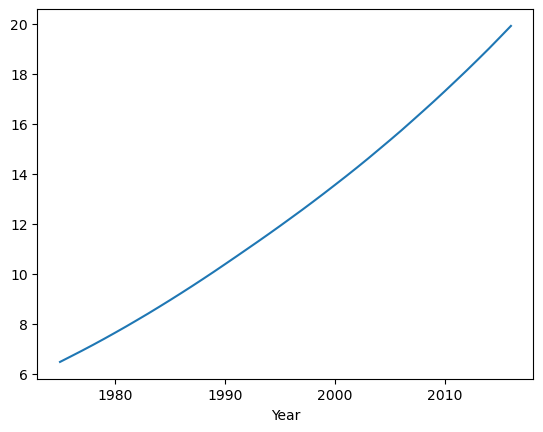

In [50]:
ambos_sex = obesidade[obesidade['Sex'] == 'Both Sex']
ambos_sex = obesidade.groupby("Year")["Obesity"].mean()
ambos_sex.plot()

## Perguntas - GDP Per Person (1901-2011)

In [51]:
gdp = pd.read_csv("GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [52]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [53]:
gdp['Year'] = gdp['Year'].apply(lambda x: int(x.split('/')[-1]))
gdp['gdp_pp'] = gdp[' GDP_pp '].apply(lambda x: float(x.split(' ')[1].replace(',', '')))
del gdp[' GDP_pp ']

In [54]:
gdp.head()

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


- Você conseguiria informar o primeiro valor registrado de cada país?

In [55]:
first_gdp = gdp.groupby('Country').min()[['Year', 'gdp_pp']]
first_gdp.head(10)

,Year,gdp_pp
Country,,
Afghanistan,1901,595.04
Albania,1901,1062.01
Algeria,1901,1807.76
Andorra,1901,3352.50
Angola,1901,525.76
Antigua and Barbuda,1901,917.85
Argentina,1901,3611.77
Armenia,1901,365.00
Australia,1901,5195.50


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [56]:
gdp[gdp['Year'] < 2000]['Year'].max()

1996

In [57]:
gdp_inicio = gdp[gdp['Year'] == 1901]
gdp_fim = gdp[gdp['Year'] == 1996]

In [58]:
((gdp_fim.groupby('Region')['gdp_pp'].mean() / gdp_inicio.groupby('Region')['gdp_pp'].mean() - 1) * 100).sort_values(ascending = False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [59]:
arr_years = np.arange(gdp["Year"].min(), gdp["Year"].max())
gdp_anos = pd.DataFrame(arr_years, columns=["Year"])
gdp_anos.index = gdp_anos['Year']

gdp_anos_off = ~gdp_anos['Year'].isin(gdp['Year'])
gdp_anos_off = gdp_anos_off[gdp_anos_off].index

gdp = gdp.sort_values(["Country", "Year"])

gdp['delta_gdp'] = gdp['gdp_pp'] - gdp['gdp_pp'].shift(1)
gdp['delta_year'] = gdp['Year'] - gdp['Year'].shift(1)
gdp['gdp_year'] = (gdp['delta_gdp'] / gdp['delta_year']).shift(-1)

gdp["next_year"] = gdp["Year"].shift(-1)
del gdp["delta_gdp"], gdp["delta_year"]

In [60]:
gdp_novos_dados = pd.DataFrame()

for idx, row in gdp.iterrows():
    if row['Year'] == 2011:
        continue
    add_years = gdp_anos_off[(gdp_anos_off < row['next_year']) & (gdp_anos_off > row['Year'])]
    
    for new_year in add_years:
        add_row = row.copy()
        add_row['gdp_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['gdp_pp']
        add_row["Year"] = new_year
        add_row['kind'] = 'estimated'
        gdp_novos_dados = pd.concat([gdp_novos_dados, add_row.to_frame().transpose()])

In [61]:
gdp = pd.concat([gdp,gdp_novos_dados])
gdp.sort_values(['Country', 'Year'], inplace = True)
gdp.index = gdp['Year']
gdp['kind'].fillna('real', inplace = True)

In [62]:
gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<AxesSubplot:xlabel='Year', ylabel='gdp_pp'>

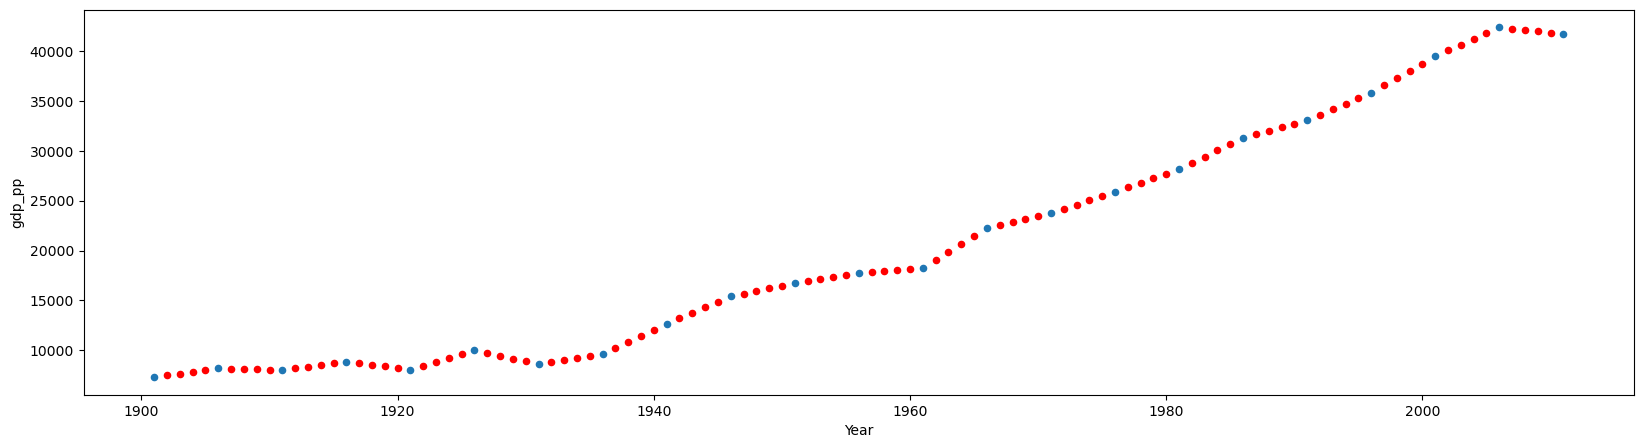

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
gdp[(gdp["kind"] == "real") & (gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
gdp[(gdp["kind"] == "estimated") & (gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [64]:
gdp['Year'] = gdp['Year'].astype(int)
gdp['gdp_pp'] = gdp['gdp_pp'].astype(float)

In [65]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']
dict_iso_num = {j : i for i, j in enumerate(gdp['Country'].unique())}

gdp['iso_alpha'] = gdp['Country'].map(dict_iso_alpha)
gdp['iso_num'] = gdp['Country'].map(dict_iso_num)

In [66]:
fig = px.choropleth(gdp[gdp['kind'] == 'real'], locations = 'iso_alpha', color = 'gdp_pp', hover_name = 'Country', animation_frame= 'Year')
fig.update_layout(height = 600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [70]:
obesidade['country-year'] = obesidade['Country'] + '-' + obesidade['Year'].apply(lambda x: str(x))
dict_obesidade = obesidade.set_index('country-year').to_dict()['Obesity']

In [73]:
gdp['country-year'] = gdp['Country'] + '-' + gdp['Year'].apply(lambda x: str(x))
gdp['Obesity'] = gdp['country-year'].map(dict_obesidade)

In [81]:
df_gdp_clean = gdp.dropna()
df_gdp_clean.reset_index(drop = True).groupby('Year')[['Obesity' , 'gdp_pp']].mean().corr()

,Obesity,gdp_pp
Obesity,1.000000,0.969378
gdp_pp,0.969378,1.000000


Obesidade e gdp per capita evoluiram juntos para o período observado! 